> **Krithika Devi Chandran**

> ***Cohort*: CDB22DW022, AI & ML**

# Telecom-Churn Analysis

Customer churn refers to when a customer (player, subscriber, user, etc.) ceases his or her relationship with a company. Businesses typically treat a customer as churned once a particular amount of time has elapsed since the customer’s last interaction with the site or service. The full cost of customer churn includes both lost revenue and the marketing costs involved with replacing those customers with new ones. Reduction customer churn is important because cost of acquiring a new customer is higher than retaining an existing one. Reducing customer churn is a key business goal of every business. This case is related to telecom industry where particular organizations want to know that for given certain parameters whether a person will churn or not.

## **Agenda**:

* Problem Statement
    * Description & Task
    * Data Description
* Import Libraries
* Data Visualisation and augmentation 
* Identify Feature Importance & Prepare the data before model training
    * Detecting and removing outliers using IQR
    * One hot encoding
    * Scaling the data
    * Stratified K-Fold Cross Validation to split Train-Test data
    * Dealing with Imbalanced Data
    * Generating Synthetic samples using SMOTE
* Train and evaluate a Logistic Regression
* Train and evaluate a  Support Vector classifer
* Train and evaluate a Gaussian Naive Bayes
* Train and evaluate a Random Forest Classifier  
* Train and evaluate a XGBoost Classifier  
* Result

### Problem Statement

* Description & task

Build, hyperparameter tune and comment the code using any machine learning algorithms for classification model
> I performed Logistic Regression, Support Vector classifier, Gaussian Naive Bayes, Random Forest classifier, XGBoost classifier models.

**Dataset**: Telecom Churn 

**Data Description**: Telecom Churn dataset with characteristics of customer interaction.

> We have a total of 5000 observations with 21 features which shows the information corresponding to telecom churn

The features are state,	account_length,	area_code,	phone_number,	international_plan,	voice_mail_plan, number_vmail_messages,	total_day_minutes,	total_day_calls, total_day_charge, ...,	total_eve_calls, total_eve_charge, total_night_minutes,	total_night_calls, total_night_charge, total_intl_minutes, total_intl_calls, total_intl_charge,	number_customer_service_calls, class 

Here the varibale 'class' is a dependent feature which notifies the churn status.

### Import Libraries

In [4]:
#!pip install cufflinks
#!pip install missingno

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import missingno as msno
import plotly.express as px # Interacitve Data Visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly module
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline()
init_notebook_mode(connected = True) # To connect Jupyter notebook with JavaScript
from sklearn import metrics 
%matplotlib inline

In [165]:
import warnings
warnings.filterwarnings("ignore")

In [166]:
# Read the CSV file
import boto3

bucket = 'mydatabuck'
file_name = 'telecom_churn.csv'

s3 = boto3.client('s3')

obj = s3.get_object(Bucket = bucket, Key = file_name)

telecom_df = pd.read_csv(obj['Body']) # 'Body' is a key word
telecom_df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


In [167]:
telecom_df['area_code'].value_counts()

415    2495
408    1259
510    1246
Name: area_code, dtype: int64

In [168]:
telecom_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [169]:
telecom_df.number_customer_service_calls.value_counts()

1    1786
2    1127
0    1023
3     665
4     252
5      96
6      34
7      13
9       2
8       2
Name: number_customer_service_calls, dtype: int64

In [170]:
telecom_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [171]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [172]:
telecom_df.shape

(5000, 21)

In [173]:
#col = telecom_df.drop(['state', 'area_code', 'phone_number', 'international_plan', 'voice_mail_plan', 'class'
 #                     , 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'], axis=1)

In [174]:
numerical_cols = telecom_df.drop(['state', 'area_code', 'phone_number', 'international_plan', 'voice_mail_plan', 'class'], axis=1)
print(numerical_cols.shape)
numerical_cols.columns

(5000, 15)


Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [175]:
numerical_cols.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [176]:
telecom_df["class"].value_counts()

0    4293
1     707
Name: class, dtype: int64

### DATA VISUALIZATION

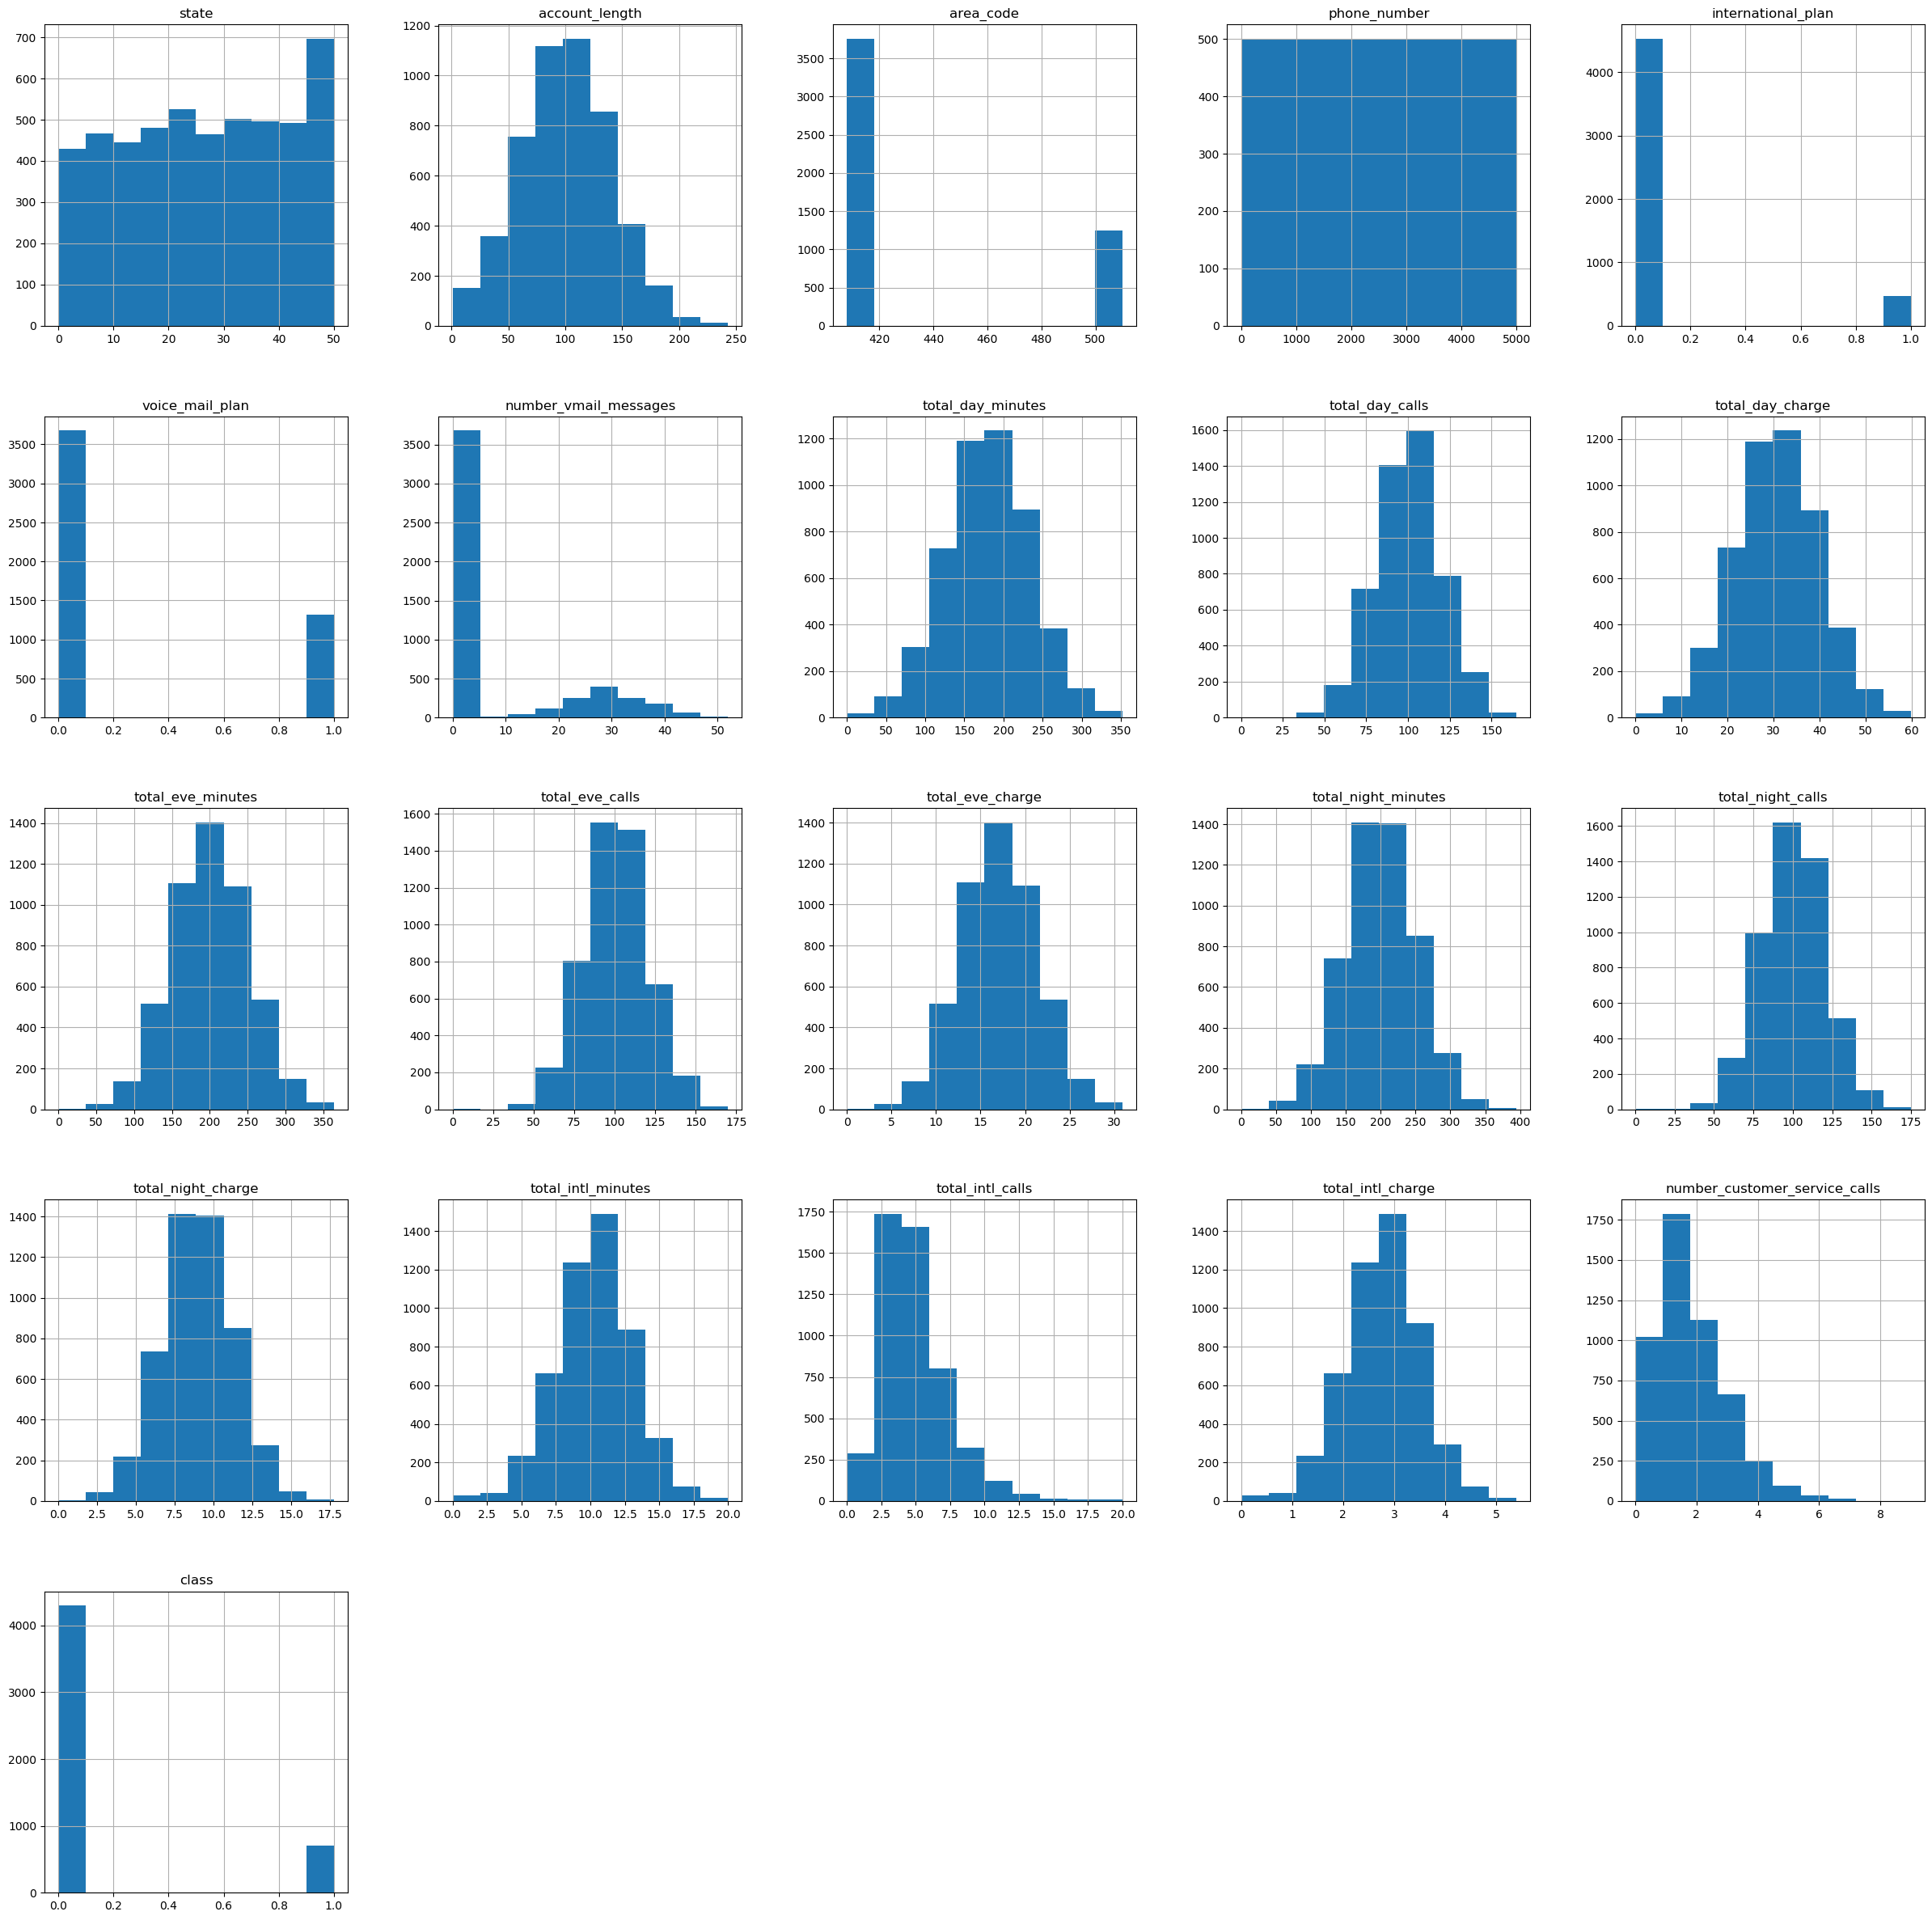

In [177]:
telecom_df.hist(figsize = (30,30))
plt.show()

Text(0.5, 1.0, 'Distribution of day charges by churn')

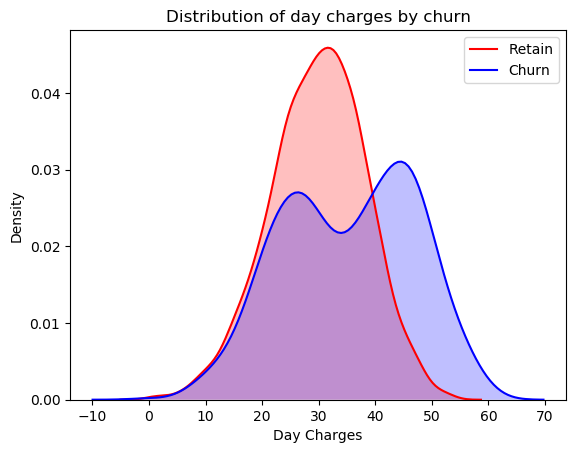

In [178]:
# Churn by day charges
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)
 
ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

* Retain of the customers is extremely high in the mid of the tenure.
* Churn is high at starting tenure as well as in end of the tenure and churn is low in the mid of the tenure.
* Churn is extremely high when Day Charges are high.

#### Multicollinearity Visualization

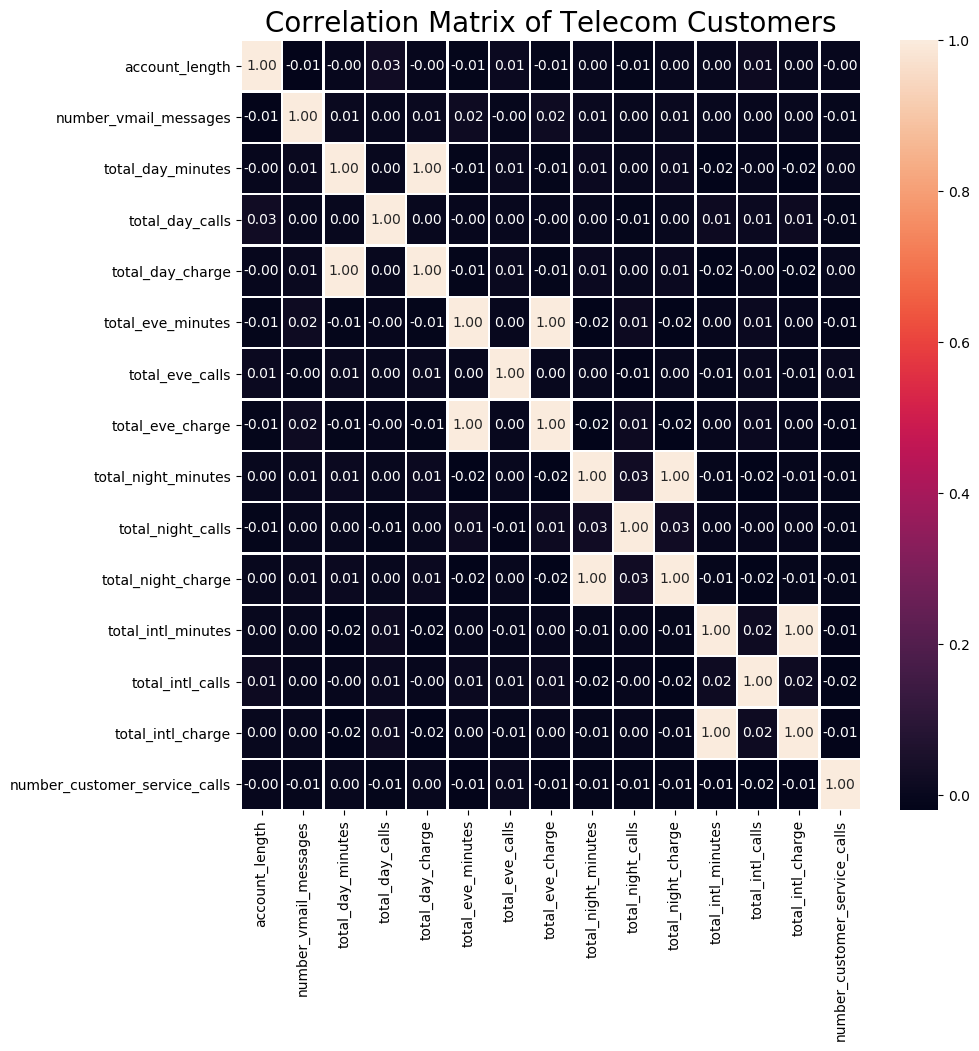

In [179]:
# Correlation matrix
corr_matrix = numerical_cols.corr()
plt.figure(figsize = (10, 10))
cm = sns.heatmap(corr_matrix,
               linewidths = 1,
               annot = True,
               fmt = ".2f")
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

Multi-Colinearity is present in, 
* total_night_charge and total_night_minutes
* total_day_charge and total_day_minutes
* total_eve_charge and total_eve_minutes
* total_intl_charge and total_intl_minutes

It is expected because if the person uses more minutes, they used to charge more. Thus, charge is highly dependent on minutes. Hence dropping off charge column and considering only minutes column.

In [180]:
len(numerical_cols.columns)

15

### IDENTIFY FEATURE IMPORTANCE & PREPARE THE DATA BEFORE MODEL TRAINING

#### Detecting and Removing Outliers

In [181]:
#pip install -U seaborn

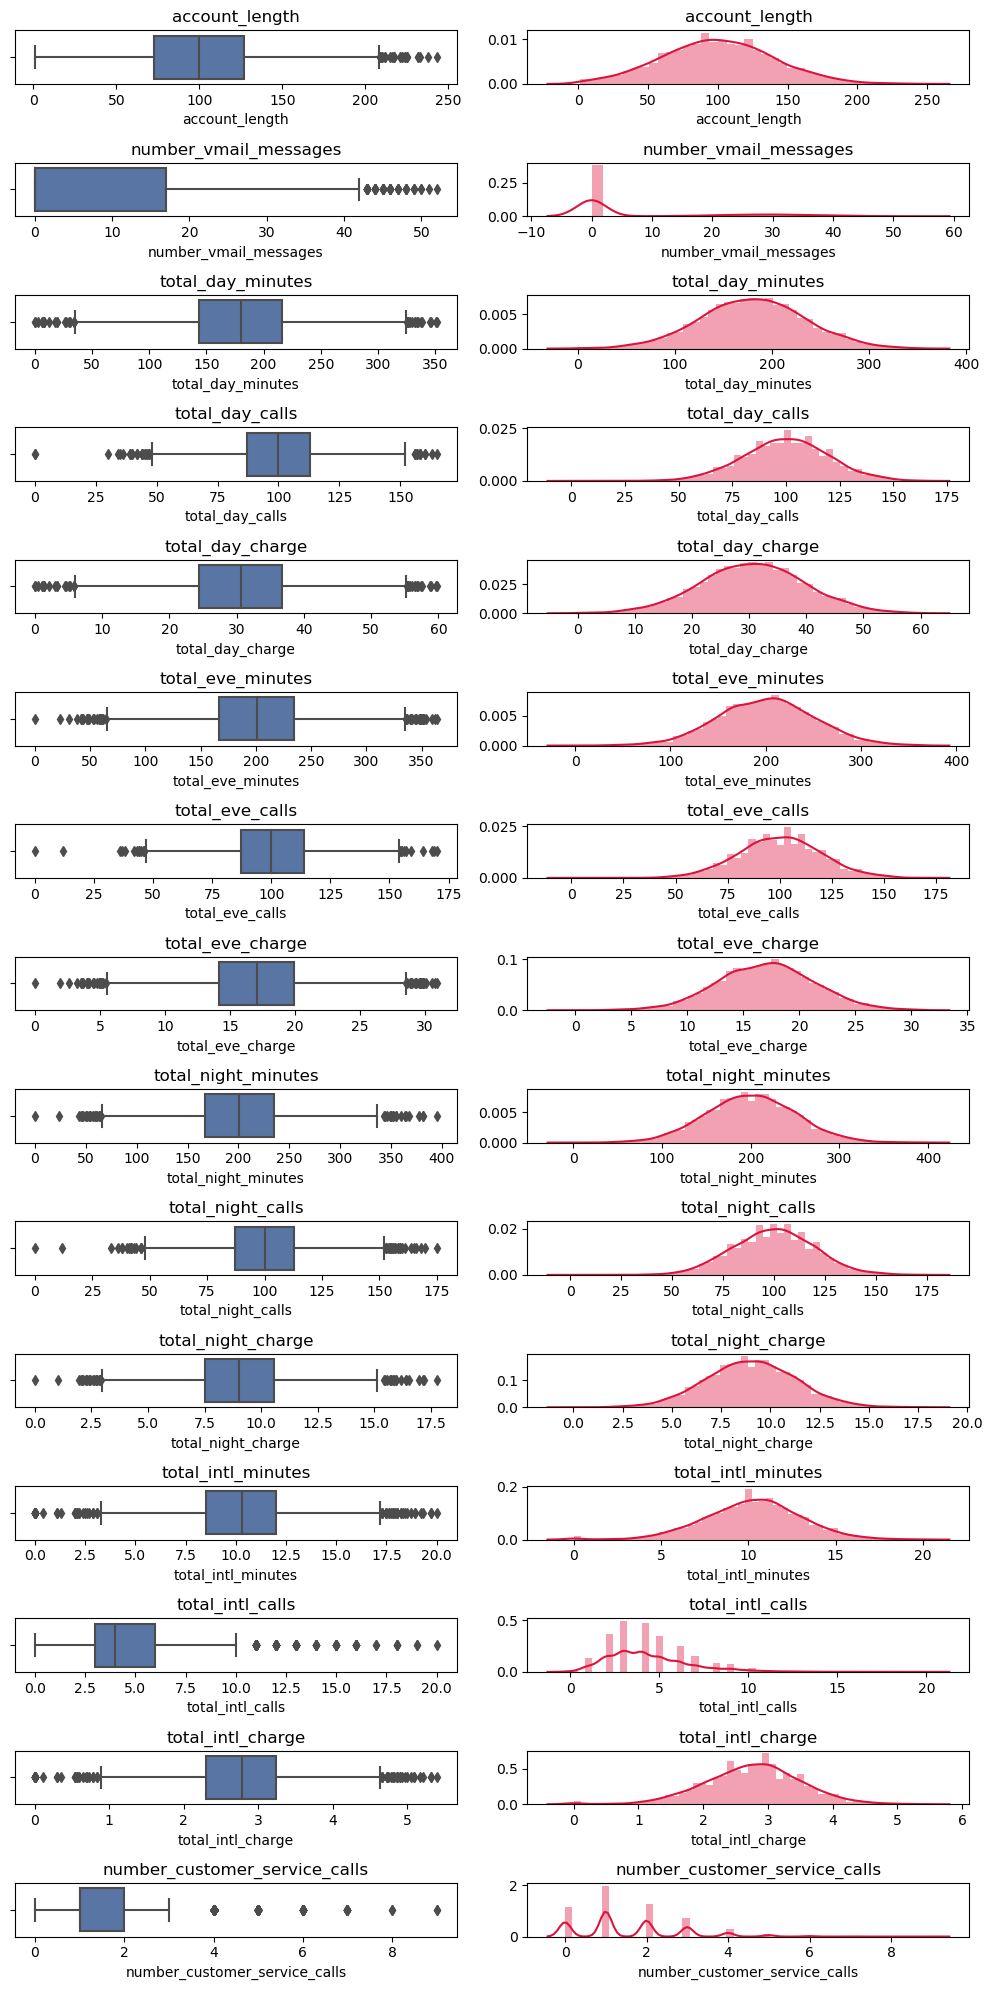

In [182]:
#fig, ax = plt.subplots(nrows=5,ncols=3)
nrows = len(numerical_cols.columns)
ncols = 2
index_plot_counter = 1

plt.figure(figsize = (10,20))
    
for i in numerical_cols.columns:
    plt.subplot(nrows, ncols, index_plot_counter)
    sns.boxplot(numerical_cols[i],palette="deep", orient="h")
    plt.title(i)
    index_plot_counter += 1
    
    plt.subplot(nrows, ncols, index_plot_counter)
    sns.distplot(numerical_cols[i],color="crimson")
    plt.title(i)
    index_plot_counter += 1

plt.tight_layout()
plt.show()

In [183]:
#ind_var = sm.add_constant(numerical_cols)
#dep_var = telecom_df['class']
#sm_model = sm.OLS(dep_var, ind_var)
#results = sm_model.fit()
#print(results.summary())

In [184]:
telecom_df.drop(['total_day_charge', 'total_eve_charge',
                              'total_night_charge', 'total_intl_charge'], axis=1, inplace = True)
print(telecom_df.shape)
telecom_df.columns

(5000, 17)


Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_eve_minutes',
       'total_eve_calls', 'total_night_minutes', 'total_night_calls',
       'total_intl_minutes', 'total_intl_calls',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [185]:
# removing phone_number, since it will not have any effect
# Dropping state it is not carrying useful information to explain the variance of  target variable
telecom_df.drop(['phone_number', 'state', 'area_code'], axis = 1, inplace = True)

In [186]:
telecom_df.columns

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_eve_minutes', 'total_eve_calls', 'total_night_minutes',
       'total_night_calls', 'total_intl_minutes', 'total_intl_calls',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [187]:
num_col = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_eve_minutes', 'total_eve_calls', 'total_night_minutes',
       'total_night_calls', 'total_intl_minutes', 'total_intl_calls',
       'number_customer_service_calls']

#### Removing outliers using IQR

In [188]:
# q1 = 25% ; q2 = 50% ; q3 = 75%
for i in num_col:
    q1 = np.percentile(telecom_df.loc[:,i],25)
    q3 = np.percentile(telecom_df.loc[:,i],75)
    
    iqr = q3-q1
    lower_tail = q1 - (1.5 * iqr)
    upper_tail = q3 + (1.5 * iqr)
    telecom_df.loc[telecom_df.loc[:,i] > upper_tail, i] = np.median(telecom_df.loc[:,i])
    telecom_df.loc[telecom_df.loc[:,i] < lower_tail, i] = np.median(telecom_df.loc[:,i])
        

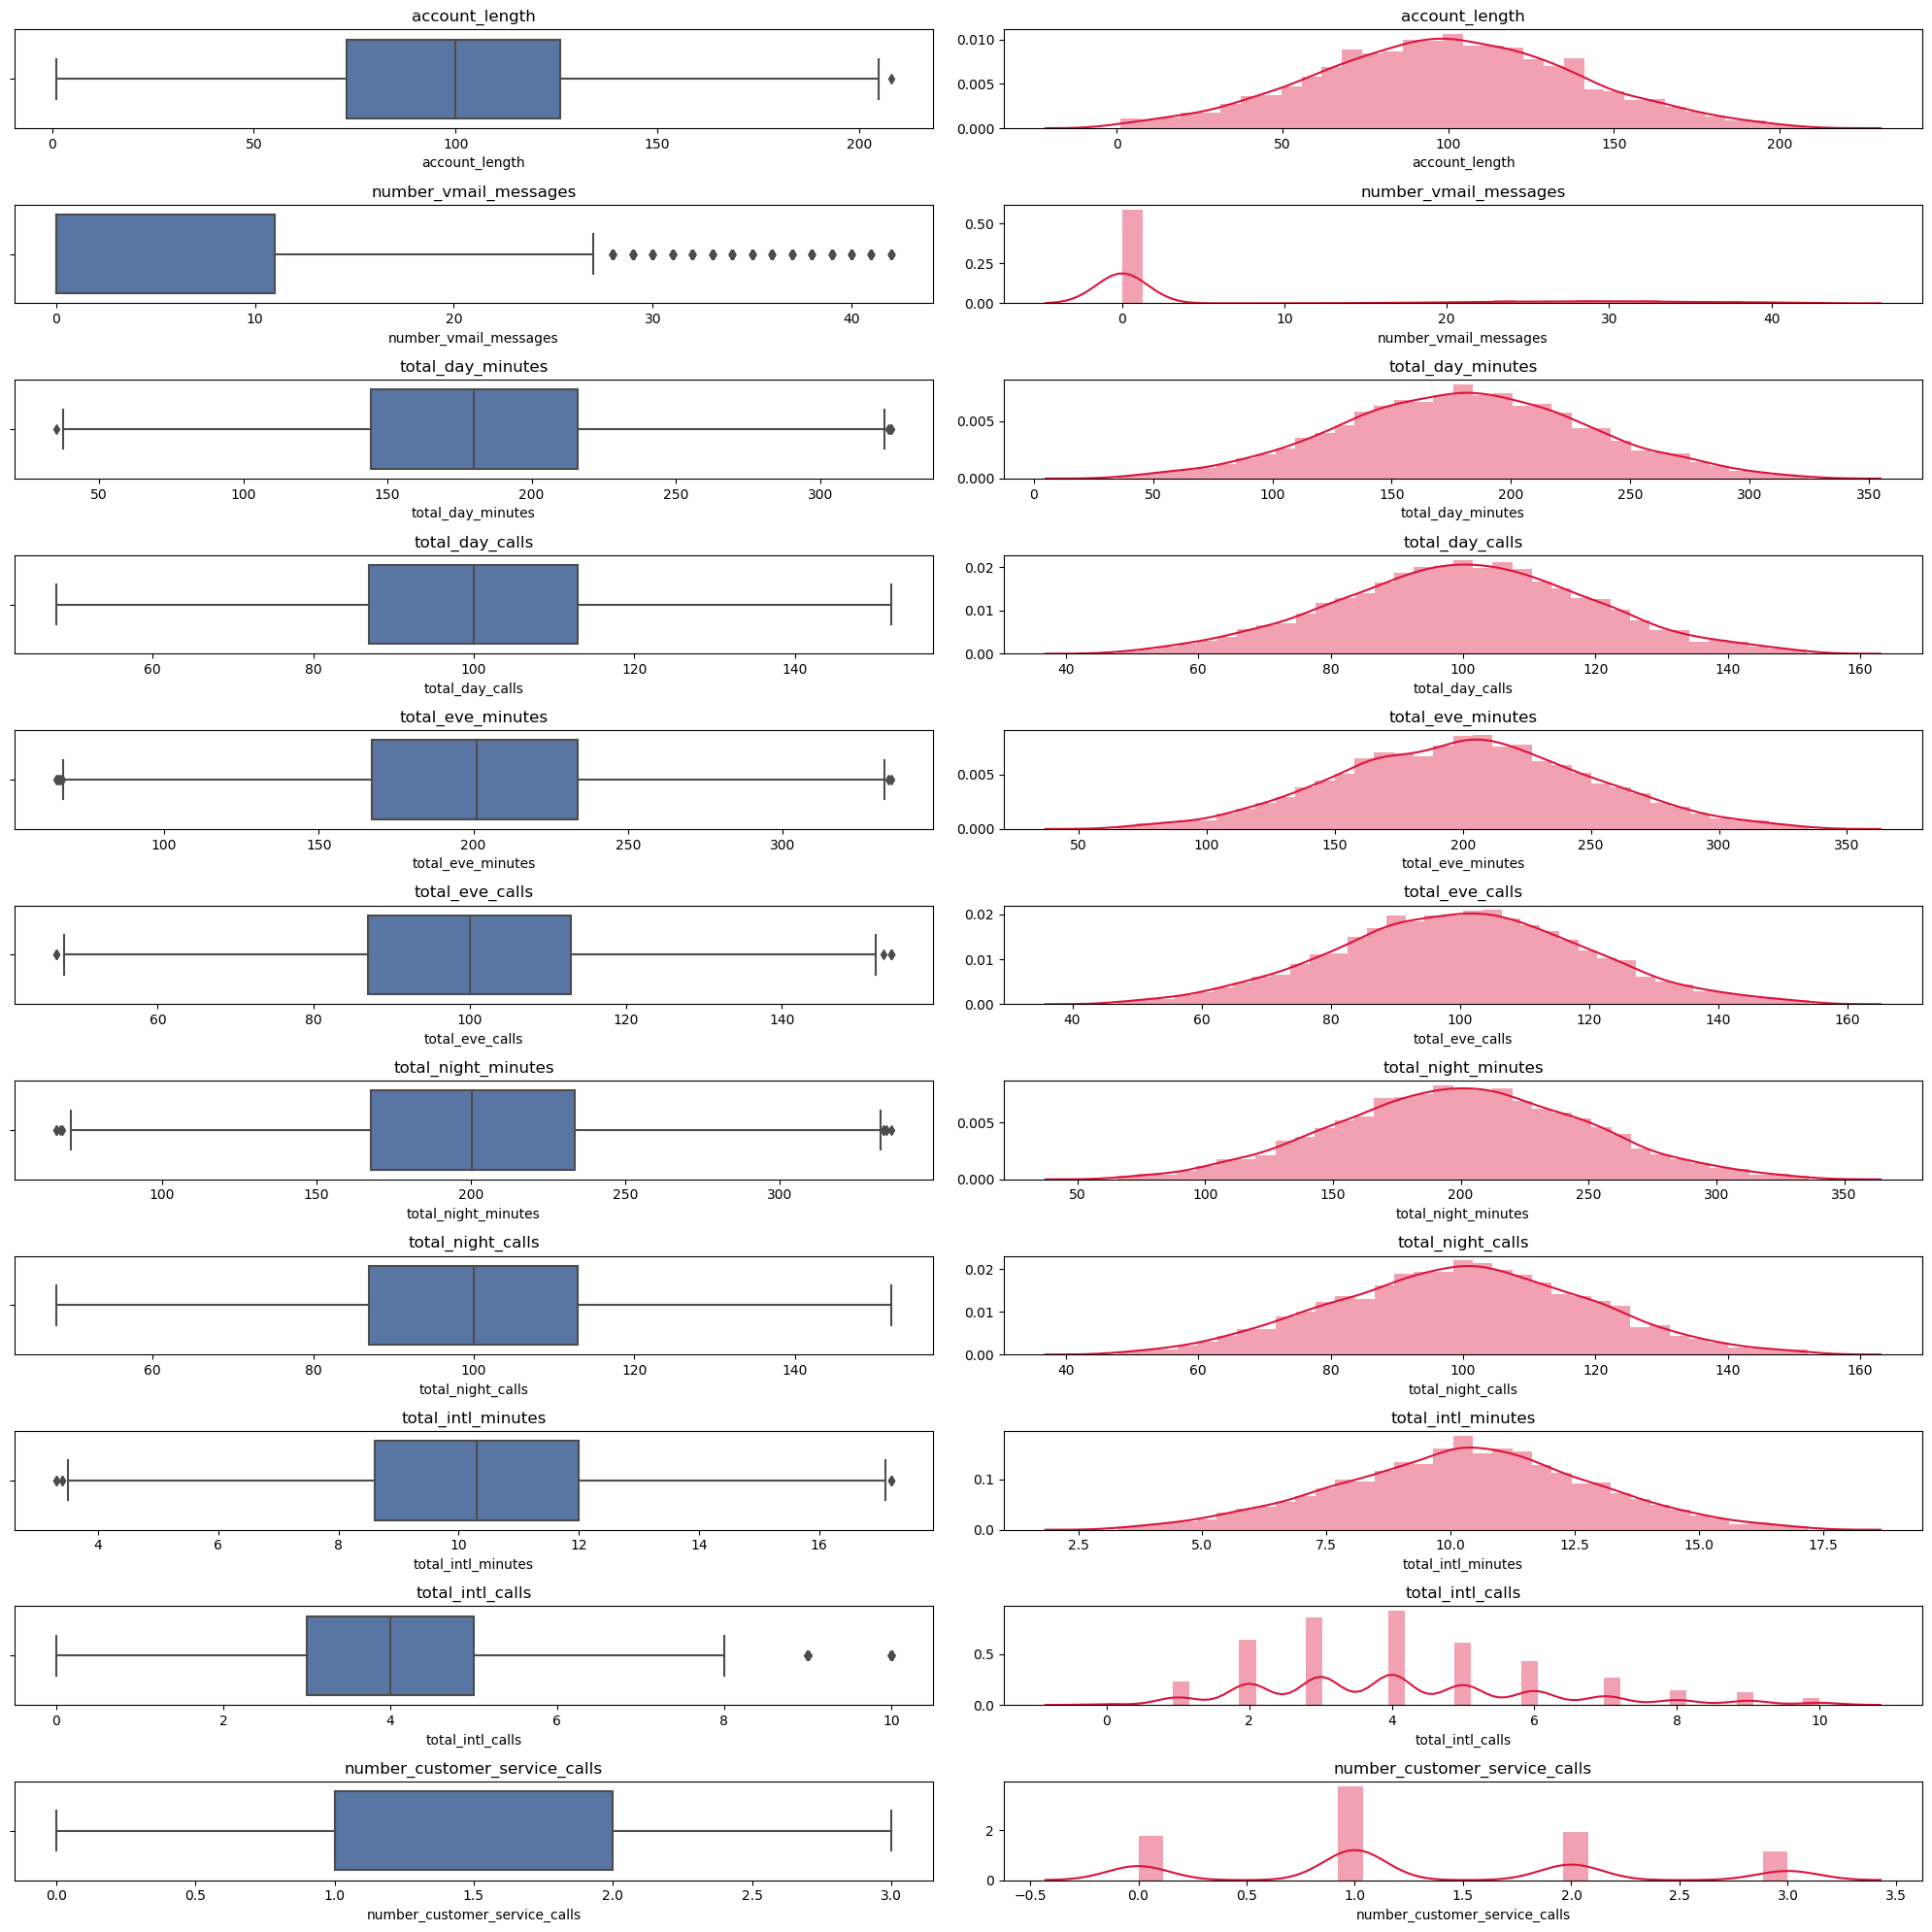

In [189]:
#fig, ax = plt.subplots(nrows=5,ncols=3)
nrows = len(num_col)
ncols = 2
index_plot_counter = 1

plt.figure(figsize = (20,20))
    
for i in num_col:
    plt.subplot(nrows, ncols, index_plot_counter)
    sns.boxplot(telecom_df[i],palette="deep", orient="h")
    plt.title(i)
    index_plot_counter += 1
    
    plt.subplot(nrows, ncols, index_plot_counter)
    sns.distplot(telecom_df[i],color="crimson")
    plt.title(i)
    index_plot_counter += 1

plt.tight_layout()
plt.show()

#### **One Hot Encoding** 

* Creating dummies for categorical columns
    
In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column.

In python there is a class **'OneHotEncoder'** in **'sklearn.preprocessing'** to do this task / we can use pandas function **'get_dummies()'**. 

In [191]:
telecom_df['international_plan'].value_counts()

0    4527
1     473
Name: international_plan, dtype: int64

In [192]:
telecom_df['voice_mail_plan'].value_counts()

0    3677
1    1323
Name: voice_mail_plan, dtype: int64

In [194]:
# Transforming the non-numerical data into numerical
encoded_telecom_df = pd.get_dummies(telecom_df, columns = ['international_plan','voice_mail_plan'])
encoded_telecom_df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,class,international_plan_0,international_plan_1,voice_mail_plan_0,voice_mail_plan_1
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,1,0,0,1
1,107,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,1,0,0,1
2,137,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,1,0,1,0
3,84,0,299.4,71,201.0,88,196.9,89,6.6,7,2,0,0,1,1,0
4,75,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,0,1,1,0


In [195]:
encoded_telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 5000 non-null   int64  
 1   number_vmail_messages          5000 non-null   int64  
 2   total_day_minutes              5000 non-null   float64
 3   total_day_calls                5000 non-null   int64  
 4   total_eve_minutes              5000 non-null   float64
 5   total_eve_calls                5000 non-null   int64  
 6   total_night_minutes            5000 non-null   float64
 7   total_night_calls              5000 non-null   int64  
 8   total_intl_minutes             5000 non-null   float64
 9   total_intl_calls               5000 non-null   int64  
 10  number_customer_service_calls  5000 non-null   int64  
 11  class                          5000 non-null   int64  
 12  international_plan_0           5000 non-null   u

Checking for missing values

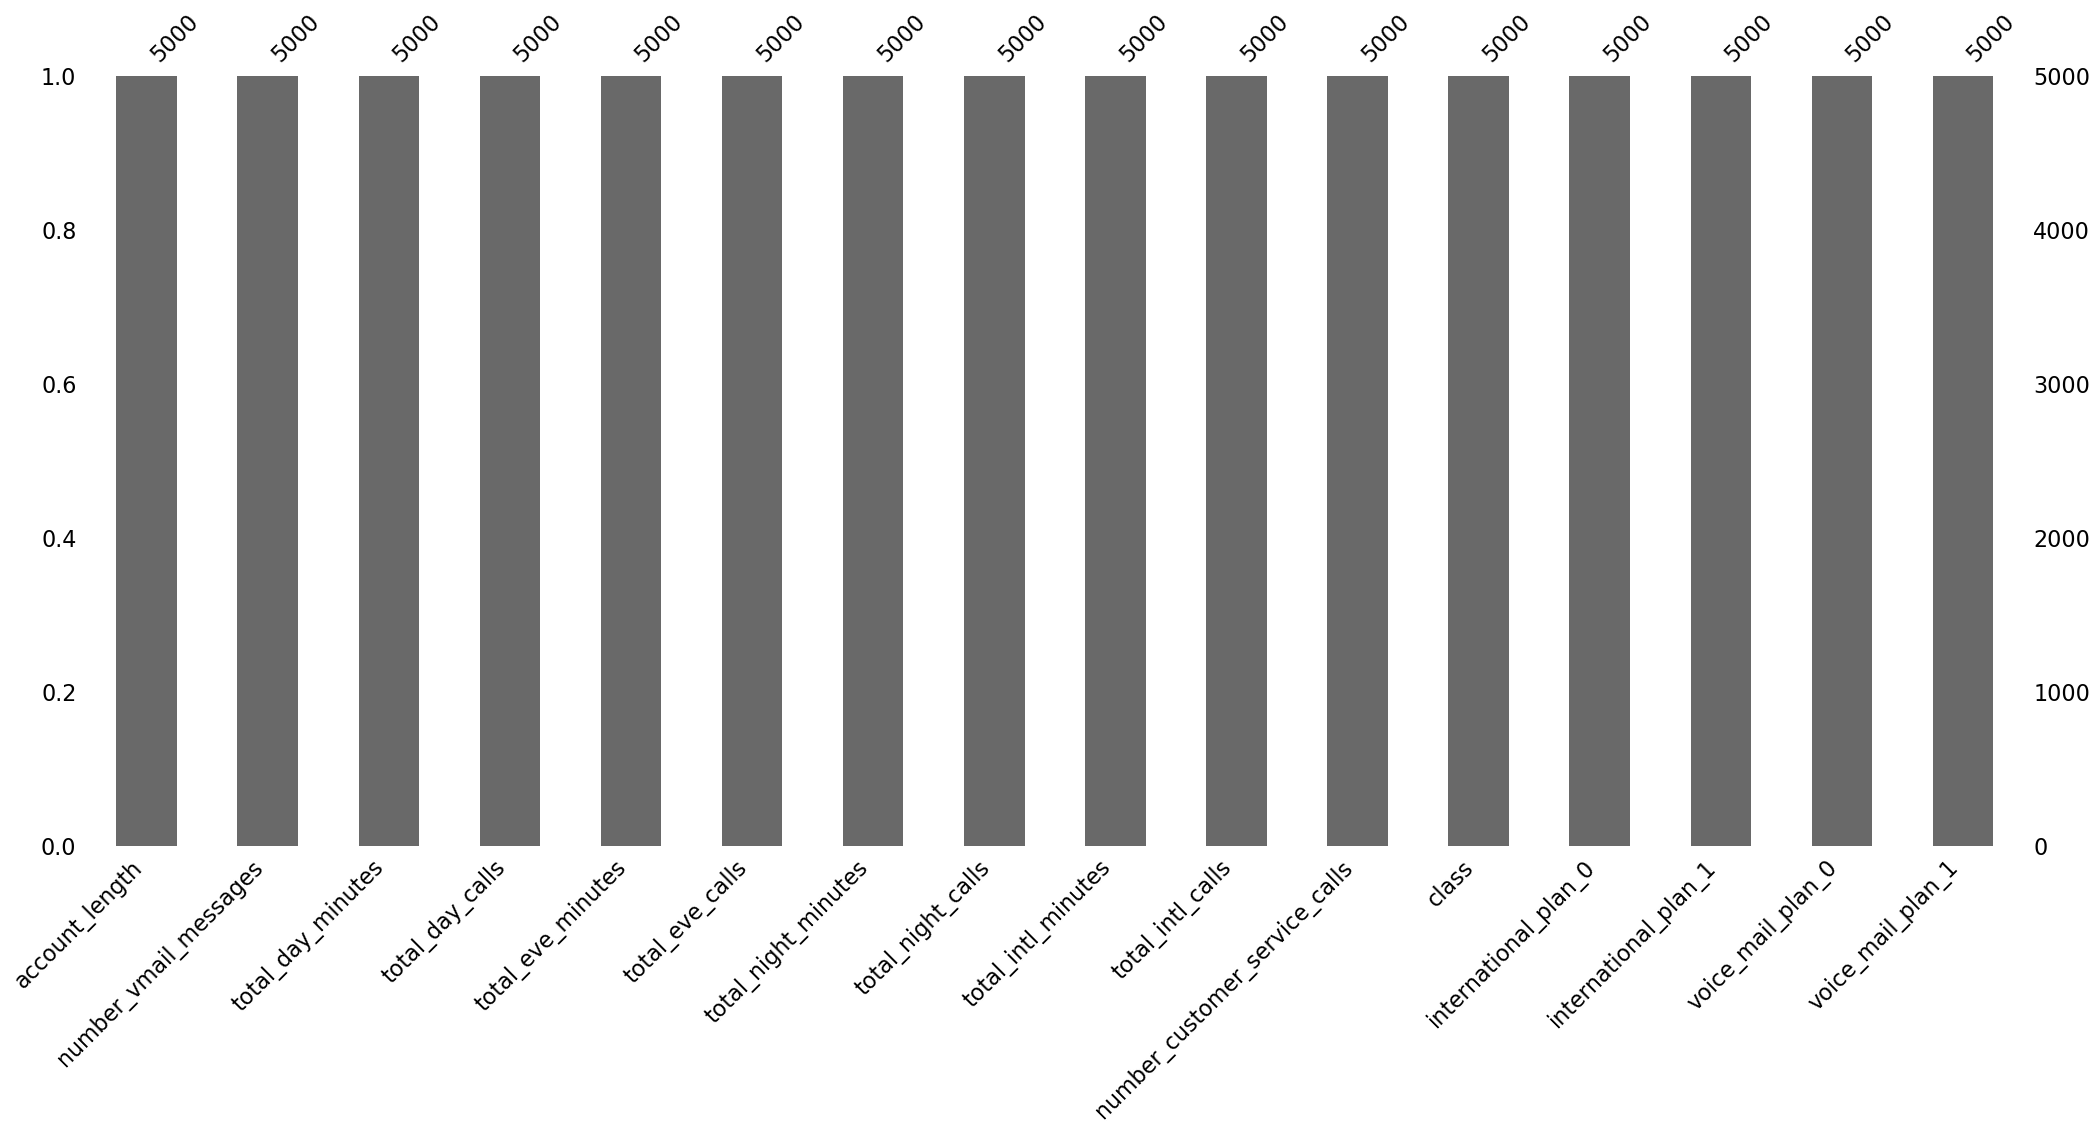

In [196]:
msno.bar(encoded_telecom_df)

There is no missing values present in the dataset.

In [197]:
encoded_telecom_df.shape

(5000, 16)

Preparing data to be able to build the model

In [198]:
# getting columns that is not encoded
non_encode_col = pd.DataFrame(encoded_telecom_df.select_dtypes(include = ['int64','float64']))
non_encode_col.drop(['class'], axis = 1,inplace=True)
nonencoded_coln = non_encode_col.columns
nonencoded_coln

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls'],
      dtype='object')

In [199]:
# taking all non-encoded independent features 

non_encoded_X = encoded_telecom_df[nonencoded_coln].values
non_encoded_X

array([[128. ,  25. , 265.1, ...,  10. ,   3. ,   1. ],
       [107. ,  26. , 161.6, ...,  13.7,   3. ,   1. ],
       [137. ,   0. , 243.4, ...,  12.2,   5. ,   0. ],
       ...,
       [ 61. ,   0. , 140.6, ...,  13.6,   4. ,   1. ],
       [109. ,   0. , 188.8, ...,   8.5,   6. ,   0. ],
       [ 86. ,  34. , 129.4, ...,   9.3,   4. ,   0. ]])

In [200]:
non_encoded_X.shape

(5000, 11)

### Scaling the data

In [201]:
# scaling the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_data = ss.fit_transform(non_encoded_X)
scaled_data

array([[ 0.72998856,  1.37740307,  1.62232308, ..., -0.11625498,
        -0.59699223, -0.305774  ],
       [ 0.18868731,  1.45482963, -0.35818445, ...,  1.33575498,
        -0.59699223, -0.305774  ],
       [ 0.96197481, -0.558261  ,  1.20708623, ...,  0.74710229,
         0.37610024, -1.37193161],
       ...,
       [-0.9970202 , -0.558261  , -0.76002656, ...,  1.29651147,
        -0.11044599, -0.305774  ],
       [ 0.24023981, -0.558261  ,  0.16229676, ..., -0.70490767,
         0.86264647, -1.37193161],
       [-0.35261395,  2.07424213, -0.97434235, ..., -0.39095957,
        -0.11044599, -1.37193161]])

In [202]:
print("Mean: ", round(scaled_data[:, 0].mean(),1))
print("Standard Deviation: ", round(scaled_data[:, 0].std(),1))

Mean:  -0.0
Standard Deviation:  1.0


### Getting Independent and dependent features

In [203]:
# merging encoded feature by dropping non-encoded feature

# removing the previous non-encoded features, since the values are not in proper range
# Also dropping independent feature, default
encoded_x = encoded_telecom_df.drop(nonencoded_coln,axis=1)
encoded_x = encoded_x.drop(['class'], axis=1)
encoded_x = encoded_x.values

In [204]:
# Independent column (Independent values of features)
X = np.concatenate((scaled_data, encoded_x), axis=1)
X

array([[ 0.72998856,  1.37740307,  1.62232308, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.18868731,  1.45482963, -0.35818445, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.96197481, -0.558261  ,  1.20708623, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.9970202 , -0.558261  , -0.76002656, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.24023981, -0.558261  ,  0.16229676, ...,  0.        ,
         1.        ,  0.        ],
       [-0.35261395,  2.07424213, -0.97434235, ...,  0.        ,
         0.        ,  1.        ]])

In [205]:
arr_df = pd.DataFrame(X) # to see the values of these independent variables (X) in a dataframe 
arr_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.729989,1.377403,1.622323,0.513278,-0.067878,-0.063913,0.910098,-0.461311,-0.116255,-0.596992,-0.305774,1.0,0.0,0.0,1.0
1,0.188687,1.454830,-0.358184,1.192327,-0.106995,0.143396,1.109567,0.165825,1.335755,-0.596992,-0.305774,1.0,0.0,0.0,1.0
2,0.961975,-0.558261,1.207086,0.722216,-1.636676,0.506187,-0.778191,0.218087,0.747102,0.376100,-1.371932,1.0,0.0,1.0,0.0
3,-0.404166,-0.558261,2.278665,-1.523871,0.006239,-0.634014,-0.072852,-0.565834,-1.450534,1.349193,0.760384,0.0,1.0,1.0,0.0
4,-0.636153,-0.558261,-0.260594,0.669982,-1.078744,1.128116,-0.278490,1.106531,-0.077011,-0.596992,1.826541,0.0,1.0,1.0,0.0


In [206]:
y = encoded_telecom_df['class'].values.reshape(-1,1)
print(y.shape)

np.unique(y, return_counts = True)

(5000, 1)


(array([0, 1]), array([4293,  707]))

### Dealing with Imbalanced Data using SMOTE

**Generate Synthetic Samples:** Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

It’s important to generate the new samples only in the training set to ensure our model generalizes well to unseen data.

In [207]:
#!pip install imblearn

In [408]:
# Using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=25, sampling_strategy = 'minority')

# fit the sampling
X_balanced, y_balanced = sm.fit_resample(X, y)

np.unique(y_balanced, return_counts = True) # y is numpy array, so unique() functions returns all the unique elements in the array

(array([0, 1]), array([4293, 4293]))

In [409]:
churn_unbalanced = pd.DataFrame(y)
churn_balanced = pd.DataFrame(y_balanced)

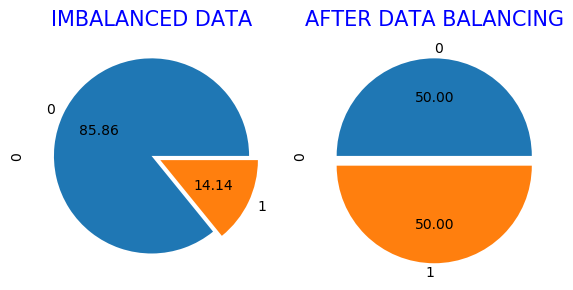

In [410]:
plt.figure(figsize=(6,6))

plt.subplot(1,2,1)
plt.title("IMBALANCED DATA", fontsize = 15, c= "b")
churn_unbalanced[0].value_counts().plot.pie(autopct="%.2f", explode=(0,0.1))

plt.subplot(1,2,2)
plt.title("AFTER DATA BALANCING", fontsize = 15, c= "b")
churn_balanced[0].value_counts().plot.pie(autopct="%.2f", explode=(0,0.1))

plt.tight_layout()

### **Stratified K-Fold Cross Validation to split Train-Test data**

We want to check the performance of the model that we built. For this purpose, we always the given data (both input and output data) into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

       Stratified K-Folds cross-validator divides all the samples in k groups of samples, called folds (if k = n, this is equivalent to the Leave One Out strategy), of equal sizes (if possible). The prediction function is learned using folds, and the fold left out is used for test.

**Each fold is constituted by two arrays:** the first one is related to the **training set**, and the second one to the **test set**.

In [411]:
from sklearn.model_selection import StratifiedKFold

# implementing Cross Validation
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_balanced, y_balanced):
    print("Train:", train_index, "Validation:", test_index)

Train: [   0    1    2 ... 8582 8583 8585] Validation: [  11   19   20 ... 8562 8581 8584]
Train: [   0    1    2 ... 8583 8584 8585] Validation: [   5    9   26 ... 8566 8572 8579]
Train: [   0    1    2 ... 8582 8583 8584] Validation: [   6    7   13 ... 8575 8577 8585]
Train: [   0    3    4 ... 8582 8584 8585] Validation: [   1    2    8 ... 8578 8580 8583]
Train: [   1    2    5 ... 8583 8584 8585] Validation: [   0    3    4 ... 8571 8576 8582]


In [412]:
print("Train shape: ", train_index.shape)
print("Test shape: ", test_index.shape)

Train shape:  (6869,)
Test shape:  (1717,)


In [413]:
X_train, X_test = X_balanced[train_index], X_balanced[test_index]
y_train, y_test = y_balanced[train_index], y_balanced[test_index]
print("X-Train shape: ", X_train.shape)
print("X-Test shape: ", X_test.shape)
print("y-Train shape: ", y_train.shape)
print("y-Test shape: ", y_test.shape)

X-Train shape:  (6869, 15)
X-Test shape:  (1717, 15)
y-Train shape:  (6869,)
y-Test shape:  (1717,)


### TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [414]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty = 'l2', max_iter = 5000, class_weight = 'balanced')
LR.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=5000)

In [415]:
y_pred_lr = LR.predict(X_test)

In [416]:
from sklearn.metrics import classification_report
print('Classification Report on Logistic Regression: \n\t\n', classification_report(y_test, y_pred_lr))

Classification Report on Logistic Regression: 
	
               precision    recall  f1-score   support

           0       0.68      0.73      0.71       858
           1       0.71      0.66      0.69       859

    accuracy                           0.70      1717
   macro avg       0.70      0.70      0.70      1717
weighted avg       0.70      0.70      0.70      1717



In [417]:
from sklearn.metrics import accuracy_score
print('Training accuracy on Logistic Regression: ', accuracy_score(y_train, LR.predict(X_train))*100,"%")
print('Test accuracy on Logistic Regression: ', accuracy_score(y_test, LR.predict(X_test))*100, "%")
# Creating a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

Training accuracy on Logistic Regression:  69.61712039598194 %
Test accuracy on Logistic Regression:  69.7146185206756 %
[[628 230]
 [290 569]]


### TRAIN AND EVALUATE A SUPPORT VECTOR MACHINE CLASSIFIER

In [418]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svc = LinearSVC(max_iter = 1000)
model_svm = CalibratedClassifierCV(model_svc)
model_svm.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC())

In [419]:
y_pred_svm = model_svm.predict(X_test)

In [420]:
from sklearn.metrics import classification_report
print('Classification Report on Support Vector Classifier: \n\t\n', classification_report(y_test, y_pred_svm))

Classification Report on Support Vector Classifier: 
	
               precision    recall  f1-score   support

           0       0.68      0.73      0.71       858
           1       0.71      0.66      0.69       859

    accuracy                           0.70      1717
   macro avg       0.70      0.70      0.70      1717
weighted avg       0.70      0.70      0.70      1717



In [421]:
from sklearn.metrics import accuracy_score
print('Training accuracy on Support Vector Classifier: ', accuracy_score(y_train, model_svm.predict(X_train))*100,"%")
print('Test accuracy on Support Vector Classifier: ', accuracy_score(y_test, model_svm.predict(X_test))*100, "%")
# Creating a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

Training accuracy on Support Vector Classifier:  69.42786431795021 %
Test accuracy on Support Vector Classifier:  69.65637740244613 %
[[626 232]
 [289 570]]


### TRAIN AND EVALUATE A GAUSSIAN NAIVE BAYES

In [422]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred_nb = NB.predict(X_test)

In [423]:
from sklearn.metrics import classification_report
print('Classification Report on Gaussian Naive Bayes: \n\t\n', classification_report(y_test, y_pred_nb))

Classification Report on Gaussian Naive Bayes: 
	
               precision    recall  f1-score   support

           0       0.71      0.80      0.75       858
           1       0.77      0.67      0.72       859

    accuracy                           0.74      1717
   macro avg       0.74      0.74      0.74      1717
weighted avg       0.74      0.74      0.74      1717



In [424]:
from sklearn.metrics import accuracy_score
print('Training accuracy on Gaussian Naive Bayes: ', accuracy_score(y_train, NB.predict(X_train))*100,"%")
print('Test accuracy on Gaussian Naive Bayes: ', accuracy_score(y_test, NB.predict(X_test))*100, "%")
# Creating a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)

Training accuracy on Gaussian Naive Bayes:  72.20847284903188 %
Test accuracy on Gaussian Naive Bayes:  73.7914967967385 %
[[689 169]
 [281 578]]


In [425]:
X_train_rn = pd.DataFrame(X_train)
X_train_rn.rename({0: 'account_length', 1: 'number_vmail_messages', 2: 'total_day_minutes',
                3: 'total_day_calls', 4: 'total_eve_minutes', 5: 'total_eve_calls',
                6: 'total_night_minutes', 7: 'total_night_calls', 8: 'total_intl_minutes',
                9: 'total_intl_calls', 10: 'number_customer_service_calls', 11:'international_plan_0',
                12: 'international_plan_1', 13:'voice_mail_plan_0', 14:	'voice_mail_plan_1'}, axis = 1, inplace=True)

In [426]:
X_train_rn.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,international_plan_0,international_plan_1,voice_mail_plan_0,voice_mail_plan_1
0,0.188687,1.454830,-0.358184,1.192327,-0.106995,0.143396,1.109567,0.165825,1.335755,-0.596992,-0.305774,1.0,0.0,0.0,1.0
1,0.961975,-0.558261,1.207086,0.722216,-1.636676,0.506187,-0.778191,0.218087,0.747102,0.376100,-1.371932,1.0,0.0,1.0,0.0
2,0.472226,-0.558261,0.824379,-0.113537,0.409761,0.039741,0.071094,0.949746,-1.568265,0.862646,-1.371932,0.0,1.0,1.0,0.0
3,0.549555,1.299977,0.724876,-0.635883,0.006239,0.402533,0.250000,0.949746,-1.097343,1.349193,1.826541,1.0,0.0,0.0,1.0
4,1.219737,-0.558261,-0.446207,-1.105994,-2.009317,-0.323050,0.233549,-0.200004,-1.254317,0.862646,-1.371932,0.0,1.0,1.0,0.0


In [427]:
y_train_rn = pd.DataFrame(y_train)
y_train_rn.rename({0: 'class'}, axis=1, inplace=True)
y_train_rn.head()

,class
0,0
1,0
2,0
3,0
4,0


In [428]:
X_test_rn = pd.DataFrame(X_test)
X_test_rn.rename({0: 'account_length', 1: 'number_vmail_messages', 2: 'total_day_minutes',
                3: 'total_day_calls', 4: 'total_eve_minutes', 5: 'total_eve_calls',
                6: 'total_night_minutes', 7: 'total_night_calls', 8: 'total_intl_minutes',
                9: 'total_intl_calls', 10: 'number_customer_service_calls', 11:'international_plan_0',
                12: 'international_plan_1', 13:'voice_mail_plan_0', 14:	'voice_mail_plan_1'}, axis = 1, inplace=True)

In [429]:
y_test_rn = pd.DataFrame(y_test)
y_test_rn.rename({0: 'class'}, axis=1, inplace=True)

### TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [430]:
#!pip install xgboost

In [431]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=200)
rf.fit(X=X_train_rn, y=y_train_rn)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

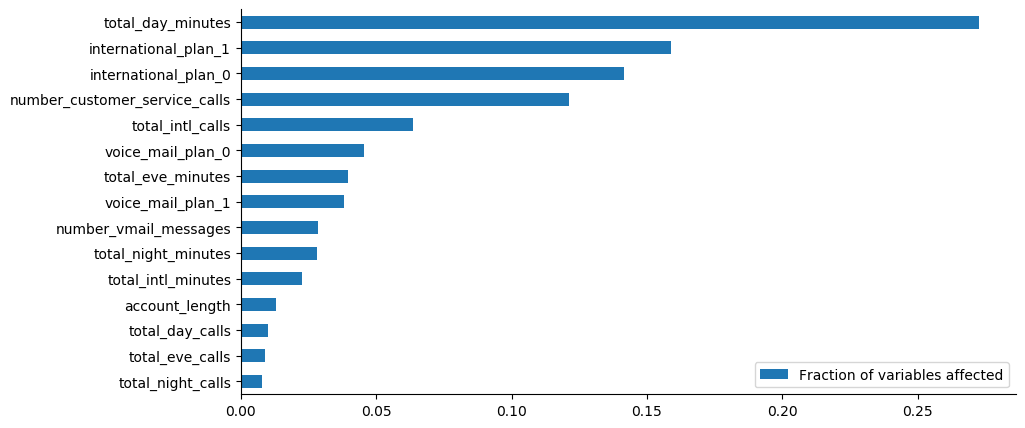

In [432]:
# Plot the feature importance

feat_scores = pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_}, index = X_train_rn.columns)
feat_scores = feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10,5))
sns.despine()

In [433]:
# Predictions on the test data
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 1, 1, ..., 0, 1, 1])

In [434]:
from sklearn.metrics import classification_report
print('Classification Report on Random Forest: \n\t\n', classification_report(y_test, y_pred_rf))

Classification Report on Random Forest: 
	
               precision    recall  f1-score   support

           0       0.74      0.90      0.81       858
           1       0.88      0.68      0.77       859

    accuracy                           0.79      1717
   macro avg       0.81      0.79      0.79      1717
weighted avg       0.81      0.79      0.79      1717



Training accuracy on Random Forest:  79.25462221575192 %
Test accuracy on Random Forest:  79.32440302853814 %
[[775  83]
 [272 587]]


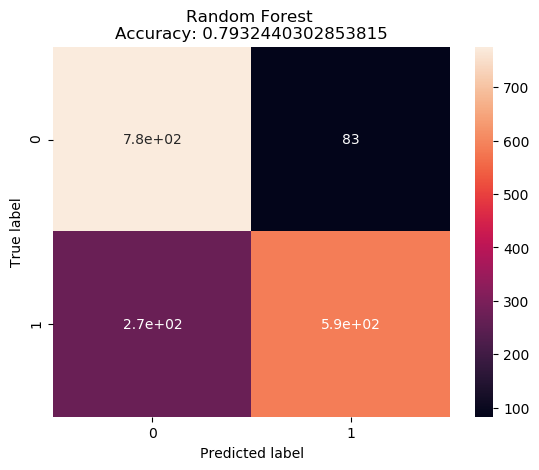

In [435]:
from sklearn.metrics import accuracy_score
print('Training accuracy on Random Forest: ', accuracy_score(y_train_rn, rf.predict(X_train_rn))*100,"%")
print('Test accuracy on Random Forest: ', accuracy_score(y_test_rn, rf.predict(X_test_rn))*100, "%")
# Creating a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test_rn, y_pred_rf)
print(cm_rf)

sns.heatmap(cm_rf, annot=True)
plt.title('Random Forest \nAccuracy: {}'.format(accuracy_score(y_test_rn, y_pred_rf)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### TRAIN AND EVALUATE A XGBOOST CLASSIFIER

In [436]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42, max_depth=5, n_estimators=1000, early_stopping_rounds=7,
                    learning_rate=0.1, colsample_bytree=0.5)
xgb.fit(X=X_train_rn, y=y_train_rn, eval_set = [(X_test_rn, y_test_rn)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=7, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

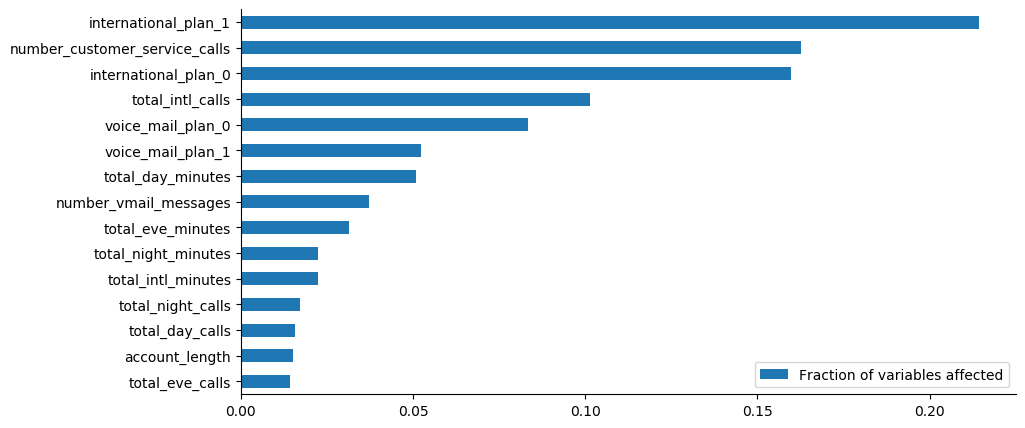

In [437]:
# Plot the feature importance

feat_scores = pd.DataFrame({"Fraction of variables affected" : xgb.feature_importances_}, index = X_train_rn.columns)
feat_scores = feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10,5))
sns.despine()

In [438]:
# Predictions on the test data
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

array([0, 1, 0, ..., 1, 1, 1])

In [439]:
from sklearn.metrics import classification_report
print('Classification Report on Random Forest: \n\t\n', classification_report(y_test, y_pred_xgb))

Classification Report on Random Forest: 
	
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       858
           1       0.96      0.94      0.95       859

    accuracy                           0.95      1717
   macro avg       0.95      0.95      0.95      1717
weighted avg       0.95      0.95      0.95      1717



Training accuracy on XGBoost:  99.3739991265104 %
Test accuracy on XGBoost:  95.22422830518346 %
[[828  30]
 [ 52 807]]


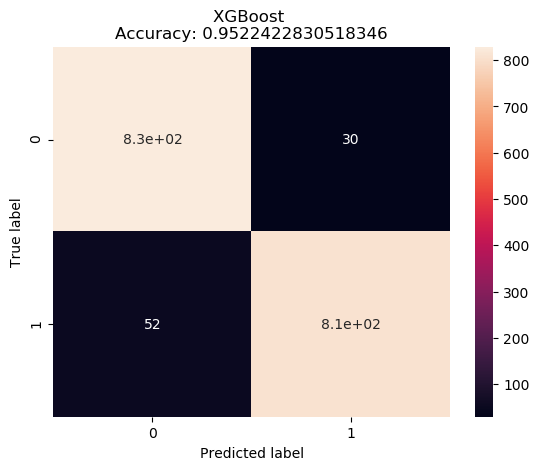

In [440]:
from sklearn.metrics import accuracy_score
print('Training accuracy on XGBoost: ', accuracy_score(y_train_rn, xgb.predict(X_train_rn))*100,"%")
print('Test accuracy on XGBoost: ', accuracy_score(y_test_rn, xgb.predict(X_test_rn))*100, "%")
# Creating a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_xgb = confusion_matrix(y_test_rn, y_pred_xgb)
print(cm_xgb)

sns.heatmap(cm_RF, annot=True)
plt.title('XGBoost \nAccuracy: {}'.format(accuracy_score(y_test_rn, y_pred_xgb)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [441]:
# from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc = roc_auc_score(y_test_rn,xgb.predict(X_test_rn))
roc_auc

0.9522497293160855

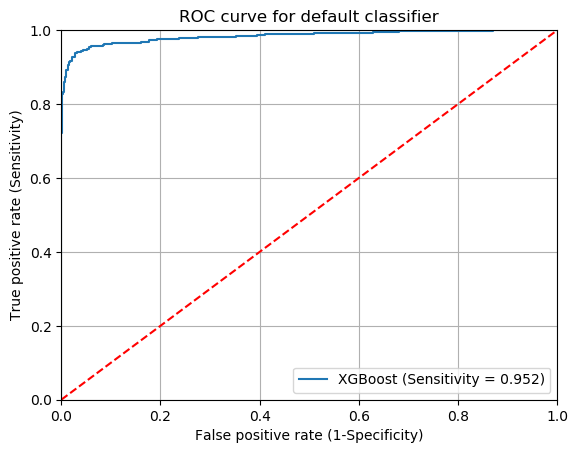

In [442]:
fpr, tpr, thresholds = roc_curve(y_test_rn, xgb.predict_proba(X_test_rn)[:,1])
plt.plot(fpr,tpr,label = 'XGBoost (Sensitivity = %0.3f)' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for default classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc='lower right')
plt.grid(True)

# **Result:** 

* When comparing test accuracy every five models, we can see that XGBoost model performs much better. The result with Precision, Recall & importantly *F1-Score*, that gives classification report of correctly classified and misclassified. It has less false classified classes in XGBoost model, which is the best.

* ROC curve quantifies the greater disparity between true positive and false positive rates. 

        Area Under Curve (AUC) in XGBoost is 0.952.
So, AUC under XGBoost classifier is more closer to 1 comparatively to other models, thus XGBoost Model is a good classifier model.